In [11]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.2/39.5 MB 25.2 MB/s eta 0:00:02
   ---------- ----------------------------- 10.7/39.5 MB 29.1 MB/s eta 0:00:01
   -------------- ------------------------- 14.4/39.5 MB 24.5 MB/s eta 0:00:02
   -------------------- ------------------- 20.2/39.5 MB 24.5 MB/s eta 0:00:01
   ------------------------------ --------- 29.6/39.5 MB 28.5 MB/s eta 0:00:01
   -------------------------------------- - 37.7/39.5 MB 30.8 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 27.9 MB/s eta 0:00:00


In [13]:
# Step 1: Importing Necessary Libraries
import os
import shutil
import hashlib
import matplotlib.pyplot as plt
import cv2

# Step 2: Creating Function for generating Hash value of each Image
def generate_image_hash(image_path):
    """Generate SHA-256 hash for the given image file."""
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    return hashlib.sha256(image_bytes).hexdigest()

# # Step 3: Getting Current Directory (Optional: just to show where you are)
# current_dir = os.getcwd()
# print("Current Working Directory:", current_dir)

# Step 4: Change directory to where your multiple images are located
folder_path = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal'
os.chdir(folder_path)
print("Changed working directory to:", os.getcwd())

# Step 5: Finding length (number) of the images in that folder
all_files = os.listdir(folder_path)
# Filter for common image formats if needed. Adjust extensions accordingly.
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
images = [f for f in all_files if f.lower().endswith(image_extensions)]
print("Total images in folder:", len(images))

# Step 6: Method for generating Hash values of each image & finding duplicates
hash_dict = {}  # This dictionary will map a hash -> list of file names having that hash

for image_file in images:
    image_hash = generate_image_hash(os.path.join(folder_path, image_file))
    if image_hash in hash_dict:
        hash_dict[image_hash].append(image_file)
    else:
        hash_dict[image_hash] = [image_file]

# Identify duplicate groups (those with more than one file name)
duplicates = {h: files for h, files in hash_dict.items() if len(files) > 1}

if duplicates:
    print("\nFound duplicate images:")
    for h, files in duplicates.items():
        print(f"Hash: {h}\nFiles: {files}\n")
else:
    print("\nNo duplicate images found.")

# Step 7: Visualizing (display one sample duplicate image from each duplicate group)
if duplicates:
    print("Displaying one sample image from each duplicate group:")
    plt.figure(figsize=(12, len(duplicates) * 4))
    for idx, (h, files) in enumerate(duplicates.items()):
        # Read the first image in the duplicate list with cv2 and convert to RGB for display
        sample_image_path = os.path.join(folder_path, files[0])
        img = cv2.imread(sample_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(duplicates), 1, idx + 1)
        plt.imshow(img_rgb)
        plt.title(f"Duplicate Group (Hash: {h}) with {len(files)} images")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Step 8: Remove duplicates by copying only one image per unique hash into a new folder.
# Creating a new folder 'normal1' within the same parent directory.
parent_dir = os.path.dirname(folder_path)  # One level above your current folder
destination = os.path.join(parent_dir, 'normal1')
os.makedirs(destination, exist_ok=True)
print("New folder for filtered images created at:", destination)

# Copy one image per hash into destination (this removes duplicates)
for h, file_list in hash_dict.items():
    # Pick the first file of this hash group
    src_file = os.path.join(folder_path, file_list[0])
    dst_file = os.path.join(destination, file_list[0])
    shutil.copy(src_file, dst_file)

print("Filtered images have been copied to the new folder.")

# Step 9: Verify new folder image count
new_images = [f for f in os.listdir(destination) if f.lower().endswith(image_extensions)]
print("Total unique images in new folder (normal1):", len(new_images))


Changed working directory to: C:\Users\Global\Fabric project\WFDD\Pink flower\normal
Total images in folder: 320

No duplicate images found.
New folder for filtered images created at: C:\Users\Global\Fabric project\WFDD\Pink flower\normal1
Filtered images have been copied to the new folder.
Total unique images in new folder (normal1): 320


In [15]:
# Step 1: Importing Necessary Libraries
import os
import shutil
import hashlib
import matplotlib.pyplot as plt
import cv2

# Step 2: Creating Function for generating Hash value of each Image
def generate_image_hash(image_path):
    """Generate SHA-256 hash for the given image file."""
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    return hashlib.sha256(image_bytes).hexdigest()

# Step 3: Getting Current Directory (Optional: just to show where you are)
current_dir = os.getcwd()
print("Current Working Directory:", current_dir)

# Step 4: Change directory to where your multiple images are located
folder_path = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect'
os.chdir(folder_path)
print("Changed working directory to:", os.getcwd())

# Step 5: Finding length (number) of the images in that folder
all_files = os.listdir(folder_path)
# Filter for common image formats if needed. Adjust extensions accordingly.
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
images = [f for f in all_files if f.lower().endswith(image_extensions)]
print("Total images in folder:", len(images))

# Step 6: Method for generating Hash values of each image & finding duplicates
hash_dict = {}  # This dictionary will map a hash -> list of file names having that hash

for image_file in images:
    image_hash = generate_image_hash(os.path.join(folder_path, image_file))
    if image_hash in hash_dict:
        hash_dict[image_hash].append(image_file)
    else:
        hash_dict[image_hash] = [image_file]

# Identify duplicate groups (those with more than one file name)
duplicates = {h: files for h, files in hash_dict.items() if len(files) > 1}

if duplicates:
    print("\nFound duplicate images:")
    for h, files in duplicates.items():
        print(f"Hash: {h}\nFiles: {files}\n")
else:
    print("\nNo duplicate images found.")

# Step 7: Visualizing (display one sample duplicate image from each duplicate group)
if duplicates:
    print("Displaying one sample image from each duplicate group:")
    plt.figure(figsize=(12, len(duplicates) * 4))
    for idx, (h, files) in enumerate(duplicates.items()):
        # Read the first image in the duplicate list with cv2 and convert to RGB for display
        sample_image_path = os.path.join(folder_path, files[0])
        img = cv2.imread(sample_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(len(duplicates), 1, idx + 1)
        plt.imshow(img_rgb)
        plt.title(f"Duplicate Group (Hash: {h}) with {len(files)} images")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Step 8: Remove duplicates by copying only one image per unique hash into a new folder.
# Creating a new folder 'normal1' within the same parent directory.
parent_dir = os.path.dirname(folder_path)  # One level above your current folder
destination = os.path.join(parent_dir, 'defect1')
os.makedirs(destination, exist_ok=True)
print("New folder for filtered images created at:", destination)

# Copy one image per hash into destination (this removes duplicates)
for h, file_list in hash_dict.items():
    # Pick the first file of this hash group
    src_file = os.path.join(folder_path, file_list[0])
    dst_file = os.path.join(destination, file_list[0])
    shutil.copy(src_file, dst_file)

print("Filtered images have been copied to the new folder.")

# Step 9: Verify new folder image count
new_images = [f for f in os.listdir(destination) if f.lower().endswith(image_extensions)]
print("Total unique images in new folder (normal1):", len(new_images))


Current Working Directory: C:\Users\Global\Fabric project\WFDD\Pink flower\normal
Changed working directory to: C:\Users\Global\Fabric project\WFDD\Pink flower\defect
Total images in folder: 32

No duplicate images found.
New folder for filtered images created at: C:\Users\Global\Fabric project\WFDD\Pink flower\defect1
Filtered images have been copied to the new folder.
Total unique images in new folder (normal1): 32


In [17]:
import os
import cv2

# Specify the folder containing images
folder_path = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal'  # Change as necessary

# Define valid image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

# Iterate over all files in the folder
print("Image Sizes in the Folder:")
for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # cv2 image shape returns (height, width, channels)
            height, width = image.shape[:2]
            print(f"{filename}: Width = {width} px, Height = {height} px")
        else:
            print(f"Could not read {filename}")


Image Sizes in the Folder:
img1.png: Width = 512 px, Height = 512 px
img10.png: Width = 512 px, Height = 512 px
img100.png: Width = 512 px, Height = 512 px
img101.png: Width = 512 px, Height = 512 px
img102.png: Width = 512 px, Height = 512 px
img103.png: Width = 512 px, Height = 512 px
img104.png: Width = 512 px, Height = 512 px
img105.png: Width = 512 px, Height = 512 px
img106.png: Width = 512 px, Height = 512 px
img107.png: Width = 512 px, Height = 512 px
img108.png: Width = 512 px, Height = 512 px
img109.png: Width = 512 px, Height = 512 px
img11.png: Width = 512 px, Height = 512 px
img110.png: Width = 512 px, Height = 512 px
img111.png: Width = 512 px, Height = 512 px
img112.png: Width = 512 px, Height = 512 px
img113.png: Width = 512 px, Height = 512 px
img114.png: Width = 512 px, Height = 512 px
img115.png: Width = 512 px, Height = 512 px
img116.png: Width = 512 px, Height = 512 px
img117.png: Width = 512 px, Height = 512 px
img118.png: Width = 512 px, Height = 512 px
img119.pn

In [19]:
import os
import cv2

# Specify the folder containing images
folder_path = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect'  # Change as necessary

# Define valid image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

# Iterate over all files in the folder
print("Image Sizes in the Folder:")
for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # cv2 image shape returns (height, width, channels)
            height, width = image.shape[:2]
            print(f"{filename}: Width = {width} px, Height = {height} px")
        else:
            print(f"Could not read {filename}")


Image Sizes in the Folder:
001.png: Width = 512 px, Height = 512 px
002.png: Width = 512 px, Height = 512 px
003.png: Width = 512 px, Height = 512 px
004.png: Width = 512 px, Height = 512 px
005.png: Width = 512 px, Height = 512 px
006.png: Width = 512 px, Height = 512 px
007.png: Width = 512 px, Height = 512 px
008.png: Width = 512 px, Height = 512 px
009.png: Width = 512 px, Height = 512 px
010.png: Width = 512 px, Height = 512 px
011.png: Width = 512 px, Height = 512 px
012.png: Width = 512 px, Height = 512 px
013.png: Width = 512 px, Height = 512 px
014.png: Width = 512 px, Height = 512 px
015.png: Width = 512 px, Height = 512 px
016.png: Width = 512 px, Height = 512 px
017.png: Width = 512 px, Height = 512 px
018.png: Width = 512 px, Height = 512 px
019.png: Width = 512 px, Height = 512 px
020.png: Width = 512 px, Height = 512 px
021.png: Width = 512 px, Height = 512 px
022.png: Width = 512 px, Height = 512 px
023.png: Width = 512 px, Height = 512 px
024.png: Width = 512 px, Heigh

Total Normal Images: 320
Total Defect Images: 32


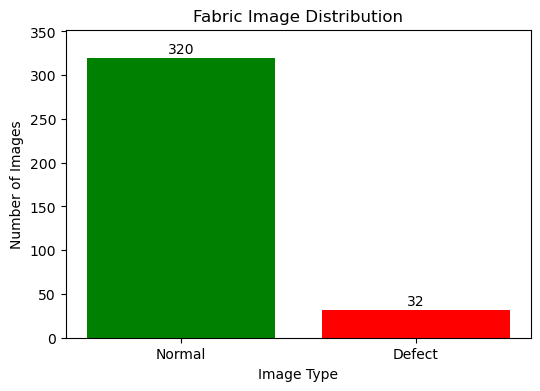

In [21]:
import os
import matplotlib.pyplot as plt

# Define paths for your image folders
normal_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\normal'
defect_folder = r'C:\Users\Global\Fabric project\WFDD\Pink flower\defect'

# Define valid image extensions (adjust as needed)
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

# Function to count images in a folder
def count_images(folder):
    return len([f for f in os.listdir(folder) if f.lower().endswith(image_extensions)])

# Get counts for each folder
normal_count = count_images(normal_folder)
defect_count = count_images(defect_folder)

# Print counts to check
print(f"Total Normal Images: {normal_count}")
print(f"Total Defect Images: {defect_count}")

# Create a bar chart to visualize image distribution
categories = ['Normal', 'Defect']
counts = [normal_count, defect_count]

plt.figure(figsize=(6, 4))
bars = plt.bar(categories, counts, color=['green', 'red'])

# Adding counts on top of the bars for clarity
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 2, f'{height}', ha='center', va='bottom')

plt.title("Fabric Image Distribution")
plt.xlabel("Image Type")
plt.ylabel("Number of Images")
plt.ylim(0, max(counts) * 1.1)  # add some space on the top for text
plt.show()
